# Bar Charts with **pandas**

The purpose of this chapter is to demonstrate how to easily generate bar charts with the **pandas** built-in `.plot()` function.

We apply this technique to the task of visualizing monthly pnls for the data set in the `spy_2018_call_pnl.csv` data file.

## Load Packages

Let's begin by loading the packages we need:

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

**Knowledge Challenge:** What is the purpose of this line of code in the above cell: `%matplotlib inline`?

In [2]:
#| code-fold: true
#| code-summary: "Solution"
# plotting graphs below code cells

## Reading-In Data

Next, let's read in the data from the CSV file.

In [3]:
df_pnl = pd.read_csv('spy_2018_call_pnl.csv')
df_pnl.head()

,underlying,upx,type,expiration,data_date,strike,bid,ask,implied_vol,delta,dly_opt_pnl,dly_dh_pnl
0,SPY,266.529999,call,2018-01-19,2017-12-15,270,1.14,1.16,0.068257,0.328344,-0.02,0.000000
1,SPY,268.230011,call,2018-01-19,2017-12-18,270,1.68,1.69,0.071450,0.421353,-0.53,0.558189
2,SPY,267.250000,call,2018-01-19,2017-12-19,270,1.39,1.41,0.074841,0.365808,0.28,-0.412931
3,SPY,267.100006,call,2018-01-19,2017-12-20,270,1.10,1.11,0.070911,0.327058,0.30,-0.054869
4,SPY,267.540009,call,2018-01-19,2017-12-21,270,1.31,1.32,0.072183,0.372113,-0.21,0.143906


This data consists of daily PNLs from 12 different SPY short call trades throughout 2018.

## Wrangling

First, we will refactor the `expiration` and `data_date` columns to `datetime` using the `pd.to_datetime()` method.

In [4]:
df_pnl['expiration'] = pd.to_datetime(df_pnl['expiration'])
df_pnl['data_date'] = pd.to_datetime(df_pnl['data_date'])
df_pnl.head()

,underlying,upx,type,expiration,data_date,strike,bid,ask,implied_vol,delta,dly_opt_pnl,dly_dh_pnl
0,SPY,266.529999,call,2018-01-19,2017-12-15,270,1.14,1.16,0.068257,0.328344,-0.02,0.000000
1,SPY,268.230011,call,2018-01-19,2017-12-18,270,1.68,1.69,0.071450,0.421353,-0.53,0.558189
2,SPY,267.250000,call,2018-01-19,2017-12-19,270,1.39,1.41,0.074841,0.365808,0.28,-0.412931
3,SPY,267.100006,call,2018-01-19,2017-12-20,270,1.10,1.11,0.070911,0.327058,0.30,-0.054869
4,SPY,267.540009,call,2018-01-19,2017-12-21,270,1.31,1.32,0.072183,0.372113,-0.21,0.143906


We are interested in total pnl, which is the sum of the option pnl and the delta-hedge PNL.  Let's add a column called `dly_tot_pnl` which captures this logic.

In [5]:
df_pnl['dly_tot_pnl'] = df_pnl['dly_opt_pnl'] + df_pnl['dly_dh_pnl']
df_pnl.head()

,underlying,upx,type,expiration,data_date,strike,bid,ask,implied_vol,delta,dly_opt_pnl,dly_dh_pnl,dly_tot_pnl
0,SPY,266.529999,call,2018-01-19,2017-12-15,270,1.14,1.16,0.068257,0.328344,-0.02,0.000000,-0.020000
1,SPY,268.230011,call,2018-01-19,2017-12-18,270,1.68,1.69,0.071450,0.421353,-0.53,0.558189,0.028189
2,SPY,267.250000,call,2018-01-19,2017-12-19,270,1.39,1.41,0.074841,0.365808,0.28,-0.412931,-0.132931
3,SPY,267.100006,call,2018-01-19,2017-12-20,270,1.10,1.11,0.070911,0.327058,0.30,-0.054869,0.245131
4,SPY,267.540009,call,2018-01-19,2017-12-21,270,1.31,1.32,0.072183,0.372113,-0.21,0.143906,-0.066094


As the final step of our wrangling, let's extract the `year` and `month` of the `expiration`, as this is what we will use for grouping.

In [6]:
df_pnl['year'] = df_pnl['expiration'].dt.year
df_pnl['month'] = df_pnl['expiration'].dt.month
df_pnl.head()

,underlying,upx,type,expiration,data_date,strike,bid,ask,implied_vol,delta,dly_opt_pnl,dly_dh_pnl,dly_tot_pnl,year,month
0,SPY,266.529999,call,2018-01-19,2017-12-15,270,1.14,1.16,0.068257,0.328344,-0.02,0.000000,-0.020000,2018,1
1,SPY,268.230011,call,2018-01-19,2017-12-18,270,1.68,1.69,0.071450,0.421353,-0.53,0.558189,0.028189,2018,1
2,SPY,267.250000,call,2018-01-19,2017-12-19,270,1.39,1.41,0.074841,0.365808,0.28,-0.412931,-0.132931,2018,1
3,SPY,267.100006,call,2018-01-19,2017-12-20,270,1.10,1.11,0.070911,0.327058,0.30,-0.054869,0.245131,2018,1
4,SPY,267.540009,call,2018-01-19,2017-12-21,270,1.31,1.32,0.072183,0.372113,-0.21,0.143906,-0.066094,2018,1


## `groupby()` and `agg()`

We are interested in graphing the PNLs by expiration, so let's sum up the `dly_tot_pnl` by the year and month of the expiration.

In [7]:
df_monthly = \
    df_pnl.groupby(['year', 'month'])['dly_tot_pnl'].agg([np.sum]).reset_index()
df_monthly.head()

,year,month,sum
0,2018,1,0.091963
1,2018,2,-2.759090
2,2018,3,-0.340270
3,2018,4,-1.174222
4,2018,5,1.487206


Before we proceed to graphing, let's change the name of the aggregated pnl column to something more meaningful.

In [8]:
df_monthly.rename(columns={'sum':'monthly_pnl'}, inplace=True)

## Visualizing the Data

Creating a simple bar graph of the `monthly_pnls` in `df_monthly` can be done easily with a single line of code.

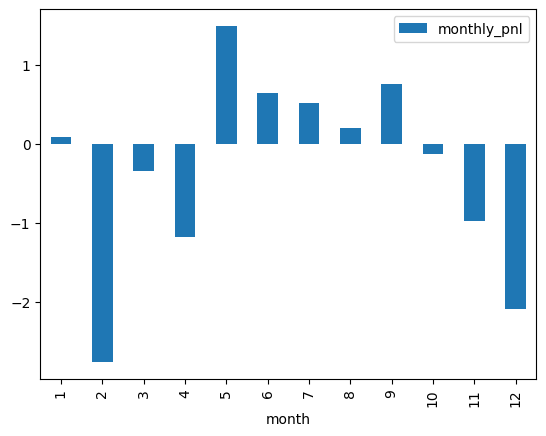

In [9]:
df_monthly.plot(x='month', y='monthly_pnl', kind='bar');

While the above graph may be fine for EDA purposes, it still leaves much to be desired, especially if our intention is to share it with a broader audience. 


The following code makes several of modifications to improve its appearance.

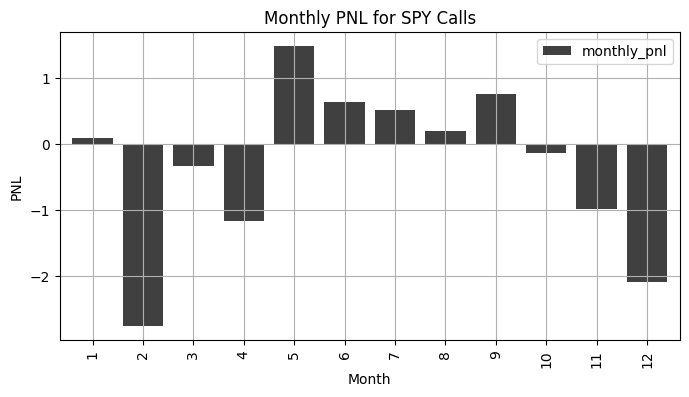

In [10]:
ax = \
    df_monthly.\
        plot(
            x = 'month',
            y = 'monthly_pnl',
            kind='bar',
            color='k', # color is grey
            grid=True , # adding a grid
            alpha=0.75, # translucence
            width=0.8, # increasing the width of the bars
            title='Monthly PNL for SPY Calls',
            figsize=(8, 4), # modifying the figure size
        );

ax.set_xlabel("Month"); # x axis label
ax.set_ylabel("PNL");   # y axis label

--- 

**Code Challenge:** Google and try to find how you create a *horizontal* bar graph using **pandas**.

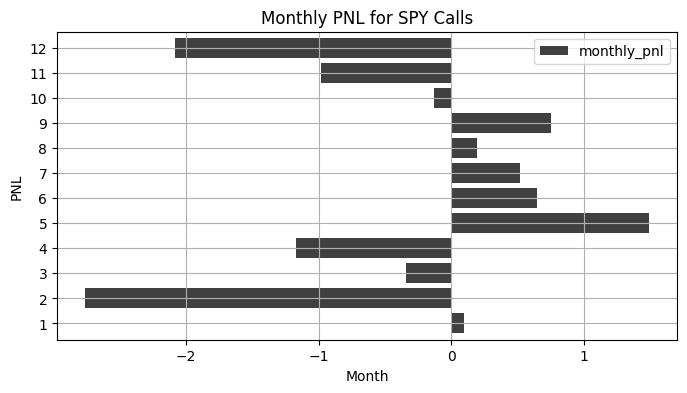

In [11]:
#| code-fold: true
#| code-summary: "Solution"
ax = \
    df_monthly.\
        plot(
            x = 'month',
            y = 'monthly_pnl',
            kind='barh', # changed to barh
            color='k', # color is grey
            grid=True , # adding a grid
            alpha=0.75, # translucence
            width=0.8, # increasing the width of the bars
            title='Monthly PNL for SPY Calls',
            figsize=(8, 4), # modifying the figure size
        );

ax.set_xlabel("Month"); # x axis label
ax.set_ylabel("PNL"); 

---

## A Few Words About Visualization

Visualizing data can be an effective way of communicating results to others, or exploring data on your own.  The benefit of visualization comes into focus when we can convey a particular result more quickly and more viscerally with a graph rather than a table of numbers.

This is nicely illustrated by comparing our bar graph to the original `DataFrame` of data.  Consider the following question: 

*What were the two worst PNL months for these SPY calls?*

Do you find it easier to answer the question using the bar graph or the table?  Explain why.

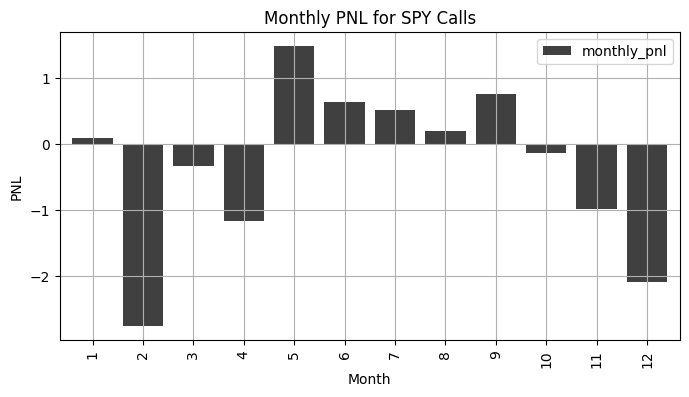

In [12]:
ax = \
    df_monthly.\
        plot(
            x = 'month',
            y = 'monthly_pnl',
            kind = 'bar', 
            color='k', # color is grey
            grid=True, # adding a grid
            alpha=0.75, # translucence
            width=0.8, # increasing the width of the bars
            title='Monthly PNL for SPY Calls',
            figsize=(8, 4), # modifying the figure size
        );

ax.set_xlabel("Month"); # x axis label
ax.set_ylabel("PNL");   # y axis label

In [13]:
df_monthly

,year,month,monthly_pnl
0,2018,1,0.091963
1,2018,2,-2.759090
2,2018,3,-0.340270
3,2018,4,-1.174222
4,2018,5,1.487206
5,2018,6,0.644469
6,2018,7,0.516556
7,2018,8,0.195526
8,2018,9,0.753701
9,2018,10,-0.133537


## Related Reading

*Python for Data Analysis (McKinney)* - Section 8.2 - Plotting Functions in **pandas** 